# Explore the Top2Vec Algorithm

## import packages

In [9]:
from time import time
import pandas as pd
from top2vec import Top2Vec

## load data

In [11]:
# load raw training data
docs  = pd.read_parquet("data/Train.parquet")
docs.head(3)

text  ...                                     tokenized_docs
0  I grew up (b. 1965) watching and loving the Th...  ...  [I, grew, up, (, b., 1965, ), watching, and, l...
1  When I put this movie in my DVD player, and sa...  ...  [When, I, put, this, movie, in, my, DVD, playe...
2  Why do people who do not know what a particula...  ...  [Why, do, people, who, do, not, know, what, a,...

[3 rows x 3 columns]

## train Top2Vec model

In [16]:
start_time = time()
model = Top2Vec(documents=docs.text.tolist(),
                embedding_model='doc2vec',
                speed='learn',
                workers=3)
stop_time = time()

2020-12-13 21:12:28,825 - top2vec - INFO - Pre-processing documents for training
2020-12-13 21:12:47,324 - top2vec - INFO - Creating joint document/word embedding
2020-12-13 21:28:01,602 - top2vec - INFO - Creating lower dimension embedding of documents
2020-12-13 21:28:28,299 - top2vec - INFO - Finding dense areas of documents
2020-12-13 21:28:31,227 - top2vec - INFO - Finding topics


In [20]:
print("Training time is: {} minutes.".format(round((stop_time - start_time)/60)))

Training time is: 16 minutes.


## explore the model

In [24]:
# get the number of topics learned by the model
num_topics = model.get_num_topics()
print("The number of topics learned by the model is: {} topics.".format(num_topics))

The number of topics learned by the model is: 449 topics.


In [23]:
# get the number of documents in each topic
topic_sizes, topic_nums = model.get_topic_sizes()


In [25]:
topic_words, word_scores, topic_nums = model.get_topics(num_topics)

In [29]:
# put topic words in a dataframe
topics_df = pd.DataFrame(topic_words)
# add the topic number to the df
topics_df['topic_number'] = topic_nums
topics_df.head(10)

0             1  ...            49 topic_number
0       waste       garbage  ...    incoherent            0
1     touched      emotions  ...        themes            1
2         vhs          copy  ...           bbc            2
3  stalingrad       germans  ...     communism            3
4      grudge        scares  ...       remakes            4
5      erotic          porn  ...  unattractive            5
6      kapoor         hindi  ...          flop            6
7     slasher      slashers  ...          prom            7
8         abc      canceled  ...       writers            8
9  christians  christianity  ...         satan            9

[10 rows x 51 columns]

In [32]:
# place the word scores in a df
word_score_df = pd.DataFrame(word_scores)
word_score_df['topic_number'] = topic_nums
word_score_df.head(10)

0         1         2  ...        48        49  topic_number
0  0.383001  0.327675  0.319715  ...  0.195314  0.194294             0
1  0.282678  0.274990  0.271641  ...  0.188887  0.185751             1
2  0.567174  0.533045  0.521059  ...  0.248264  0.247994             2
3  0.568421  0.552386  0.516027  ...  0.287634  0.287443             3
4  0.547914  0.547639  0.460149  ...  0.217339  0.216670             4
5  0.560924  0.542560  0.488948  ...  0.205001  0.201593             5
6  0.712522  0.686342  0.685298  ...  0.152966  0.152196             6
7  0.609226  0.497317  0.438644  ...  0.253683  0.249227             7
8  0.662056  0.534731  0.522713  ...  0.205564  0.203626             8
9  0.616471  0.591840  0.577290  ...  0.211826  0.211328             9

[10 rows x 51 columns]

## Search Topics

In [43]:
# search for the top 5 most similar topics to a query: "love"
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["love"],
                                                                         num_topics=5)

In [48]:
print("The topic numbers that are most similar to topic love is : {0}, {1}, {2}, {3} and {4}\n".format(topic_nums[0],
                                                                                                     topic_nums[1],
                                                                                                     topic_nums[2],
                                                                                                     topic_nums[3],
                                                                                                     topic_nums[4]))
print("The similarity scores for the 5 most similar topics to topic love is: {0}, {1}, {2}, {3} and {4}".format(round(topic_scores[0], 2),
                                                                                                                round(topic_scores[1], 2),
                                                                                                                round(topic_scores[2], 2),
                                                                                                                round(topic_scores[3], 2),
                                                                                                                round(topic_scores[4], 2)))

The topic numbers that are most similar to topic love is : 308, 125, 250, 181 and 426

The similarity scores for the 5 most similar topics to topic love is: 0.12, 0.12, 0.11, 0.1 and 0.1


## Generate Word Clouds for topics

### Topic Love

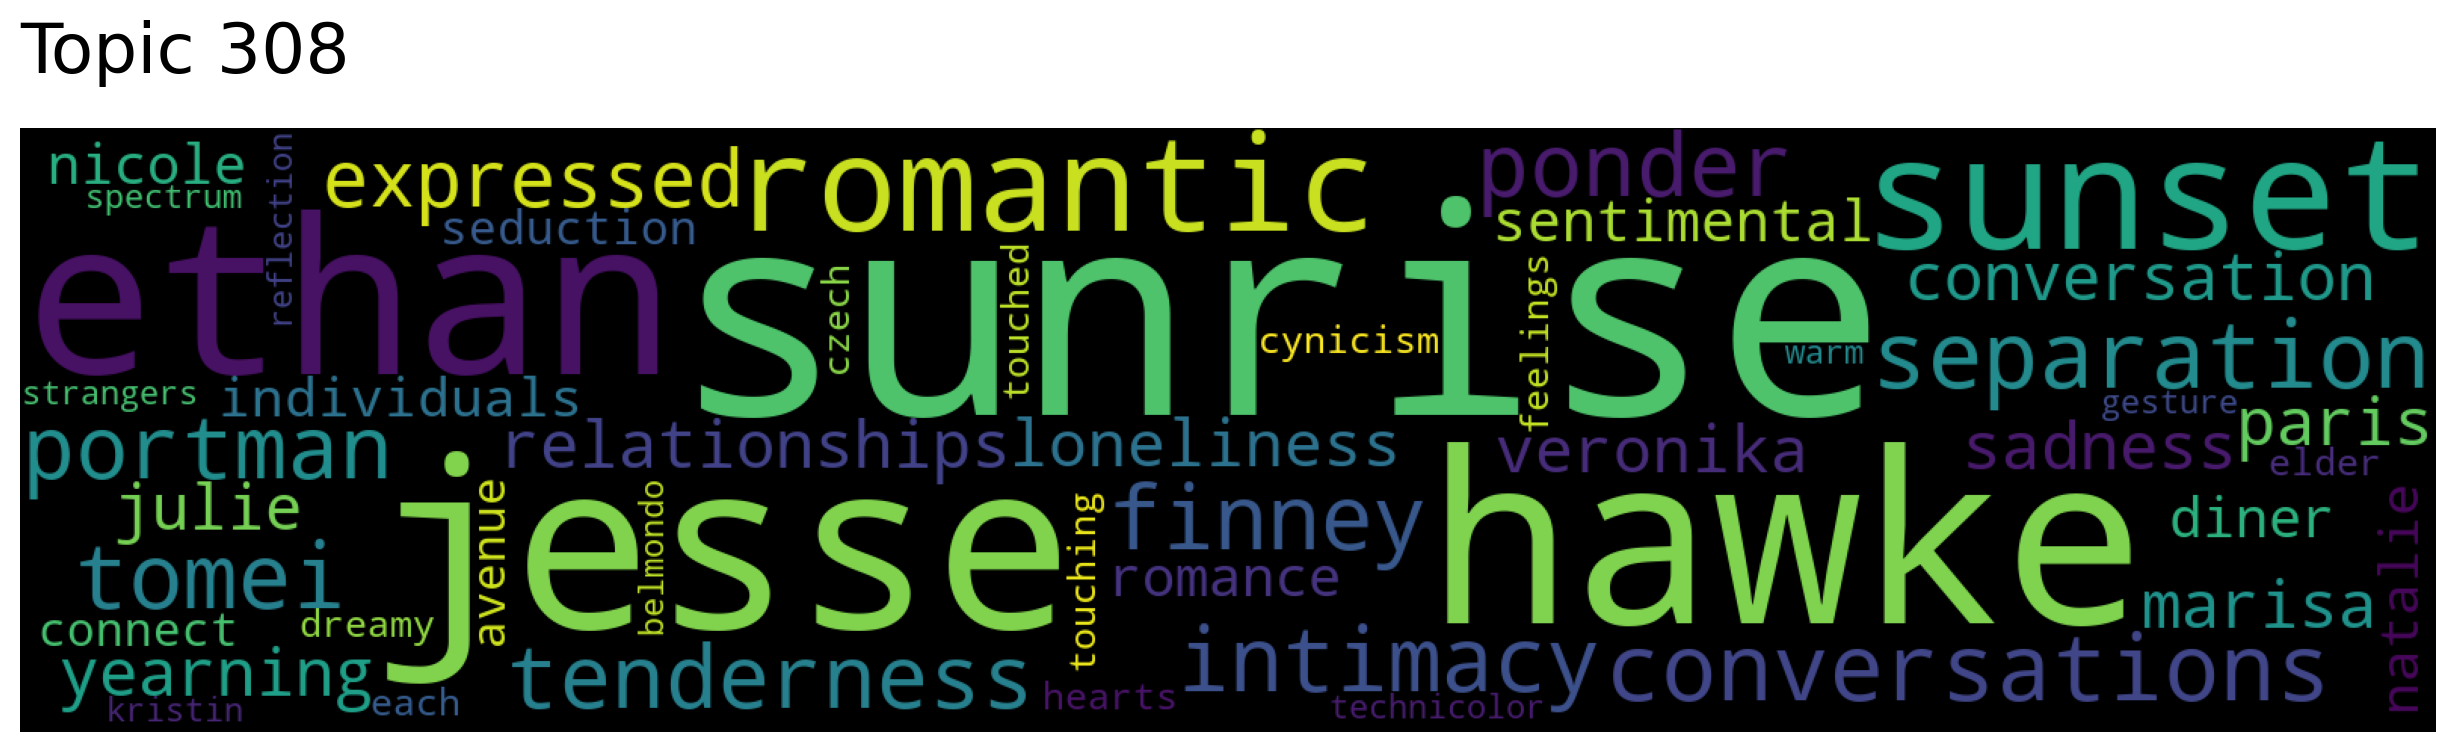

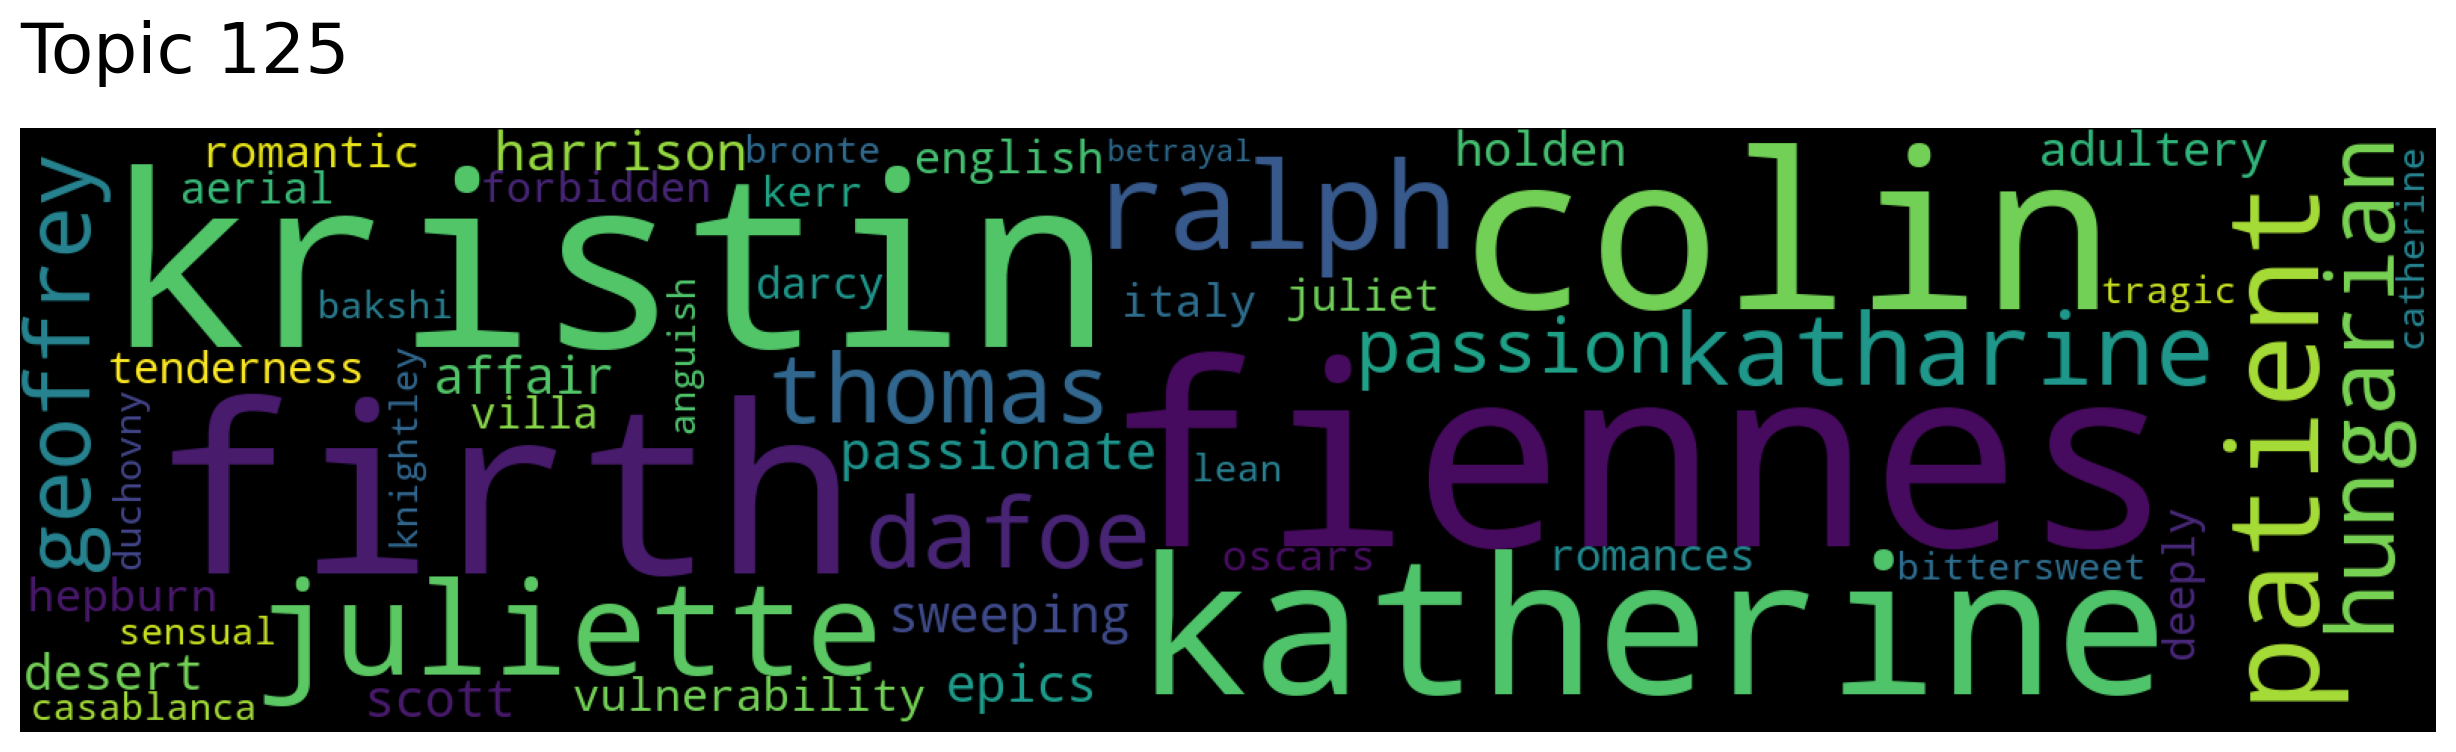

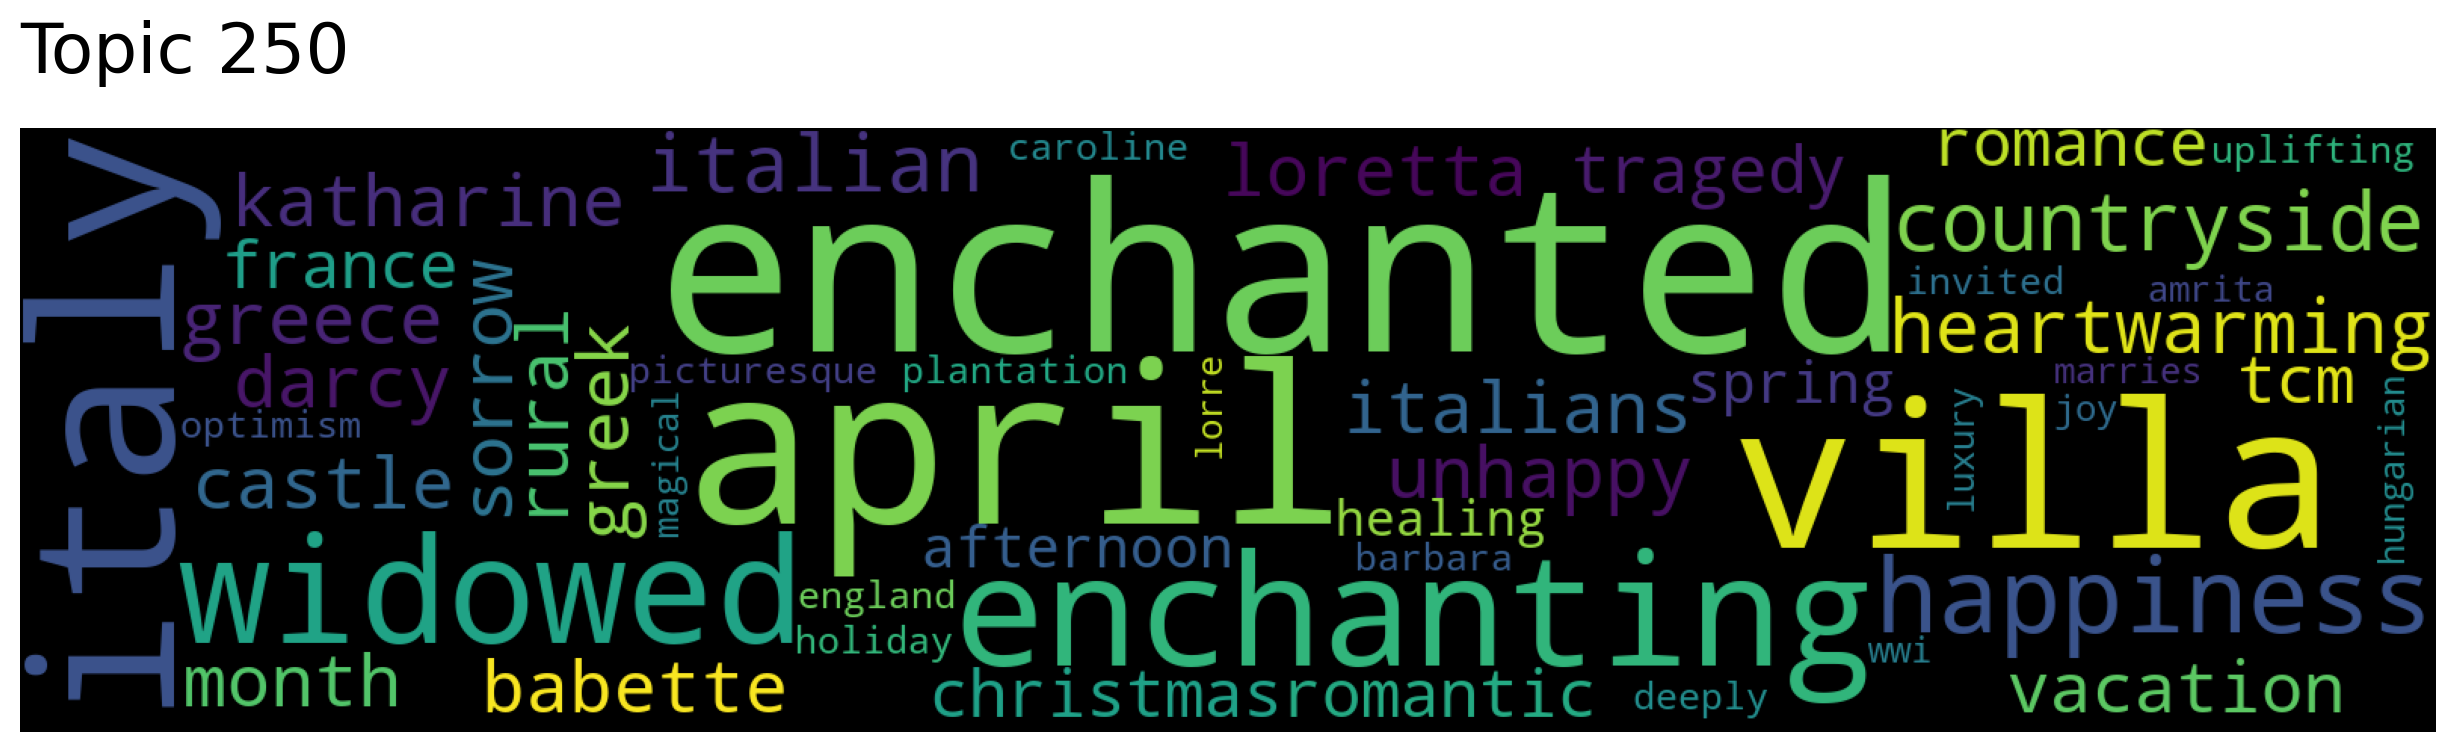

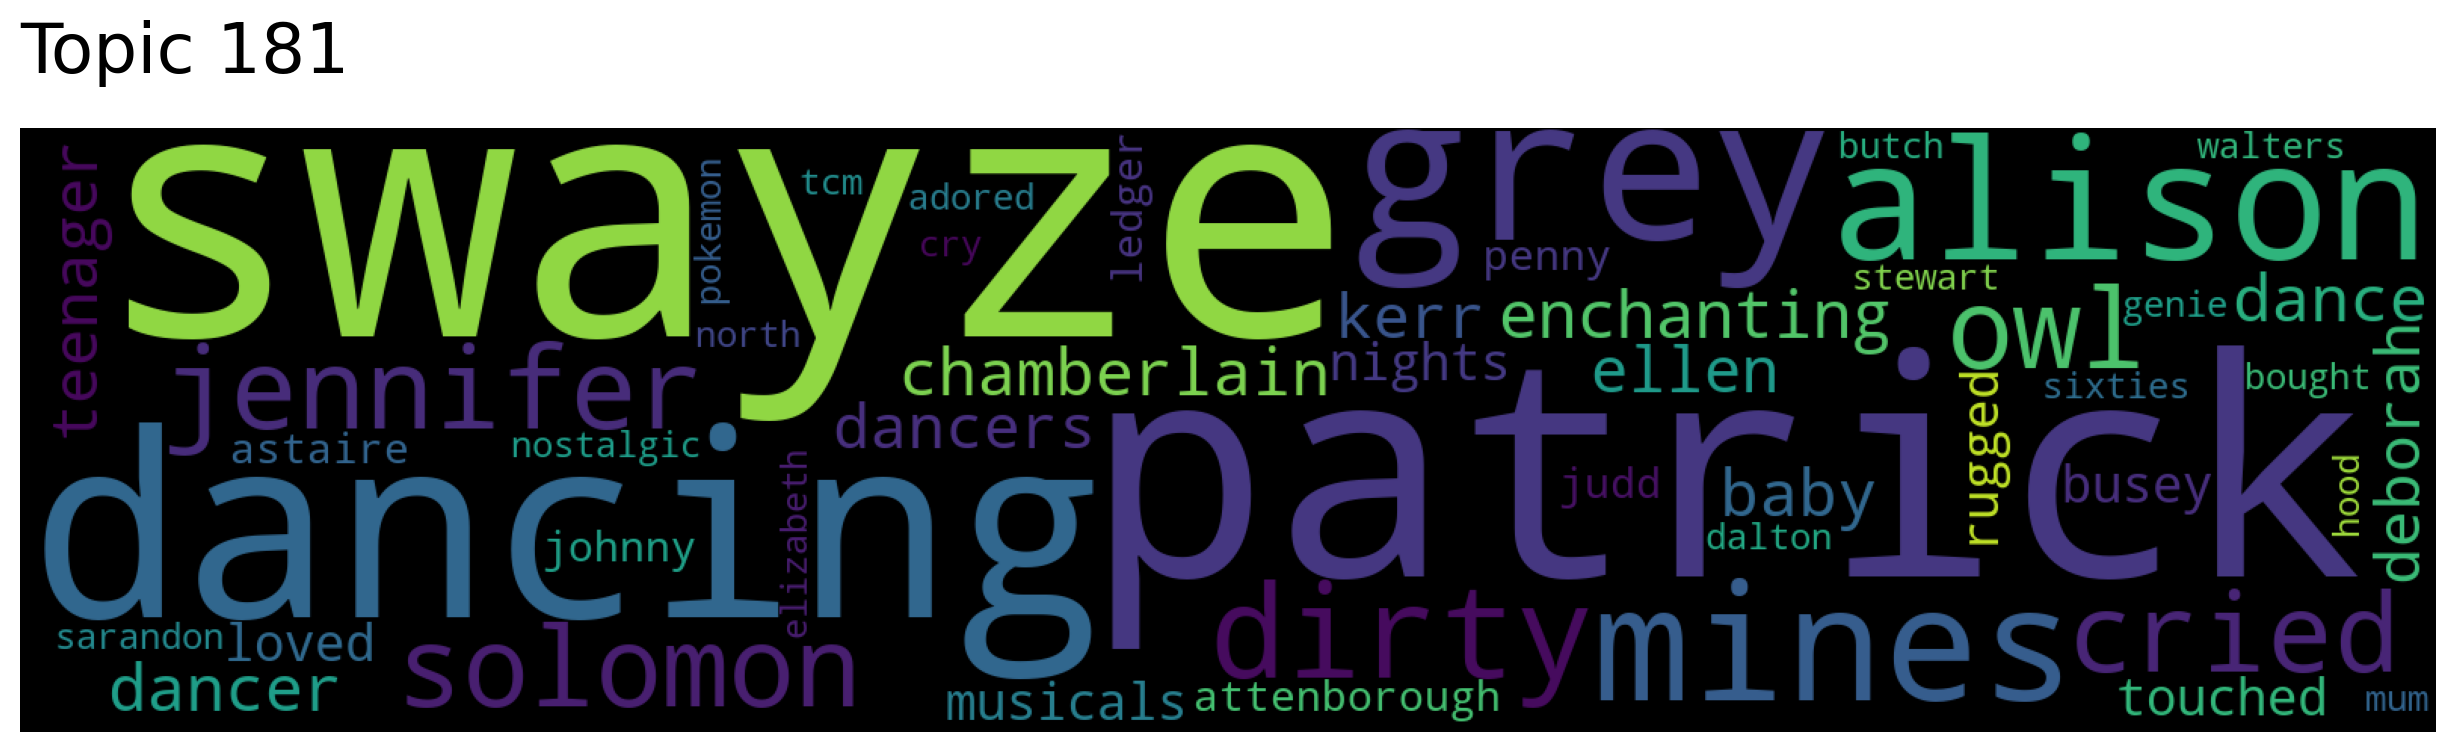

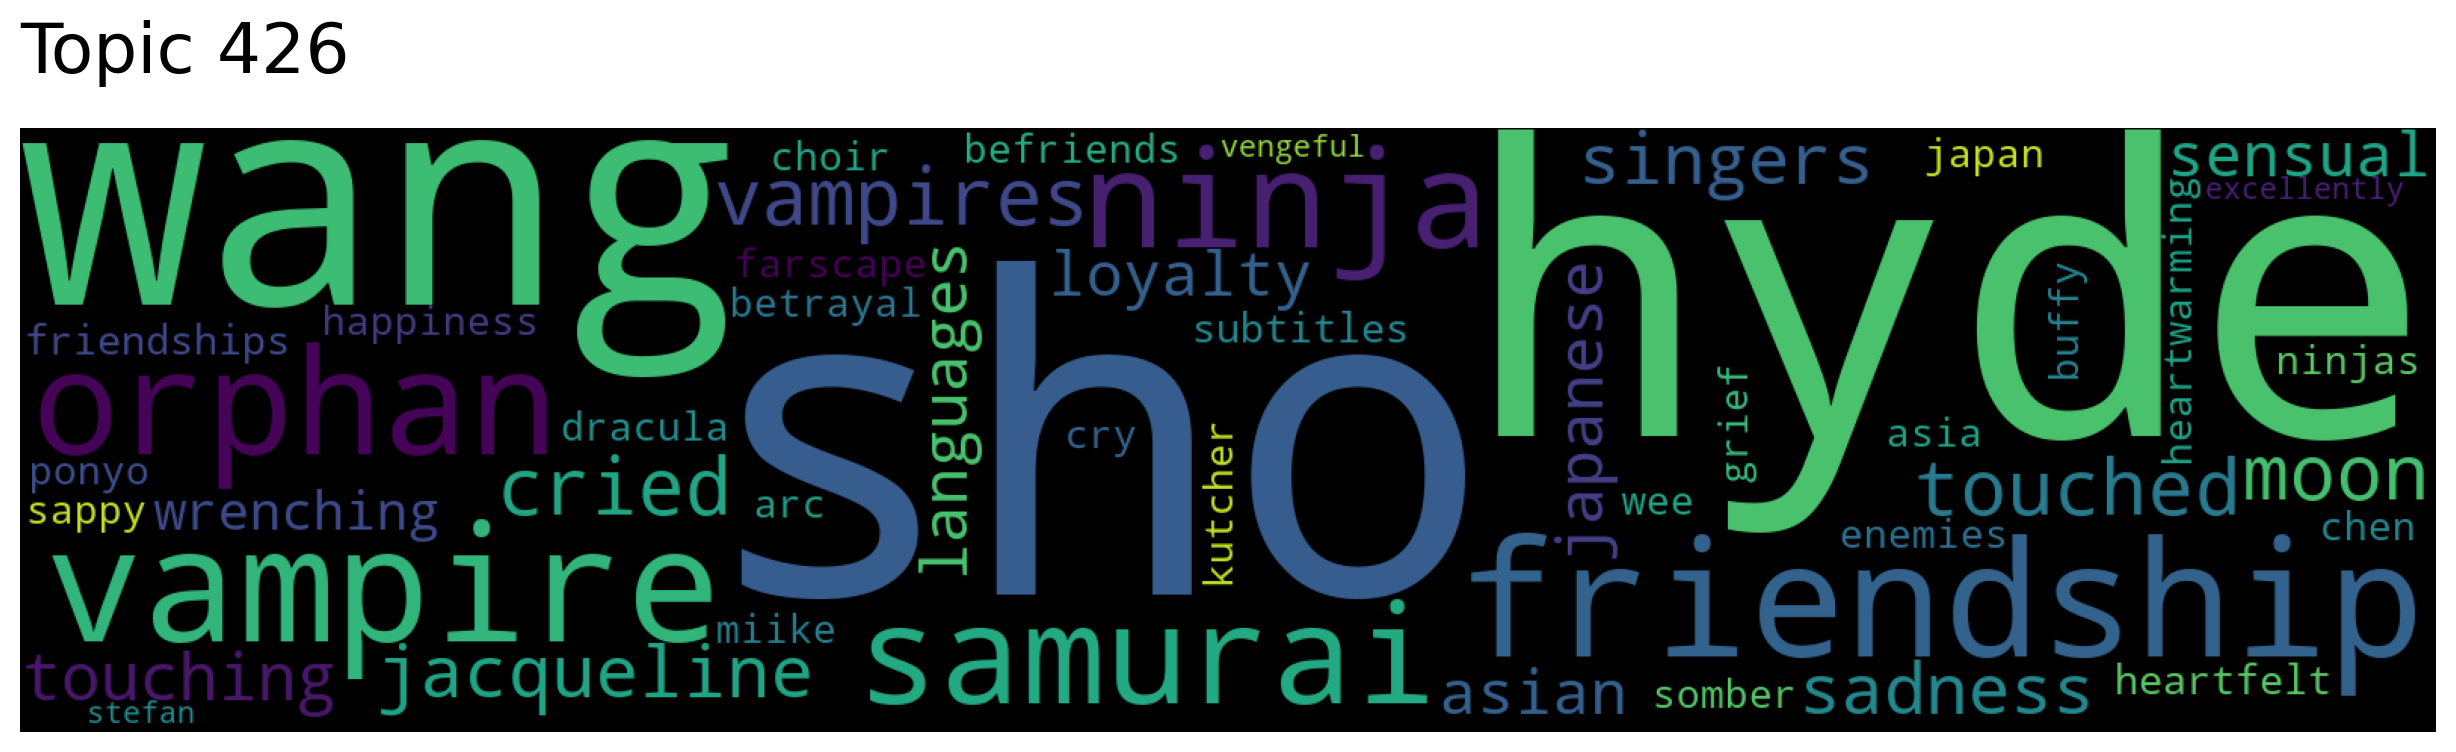

In [50]:
# generate wordcloud for the 5 most similar topic to "love"
for topic_num in topic_nums:
    model.generate_topic_wordcloud(topic_num)

### Topic Music

The similarity scores for the 5 most similar topics to topic music is: 0.28, 0.28, 0.24, 0.23 and 0.21


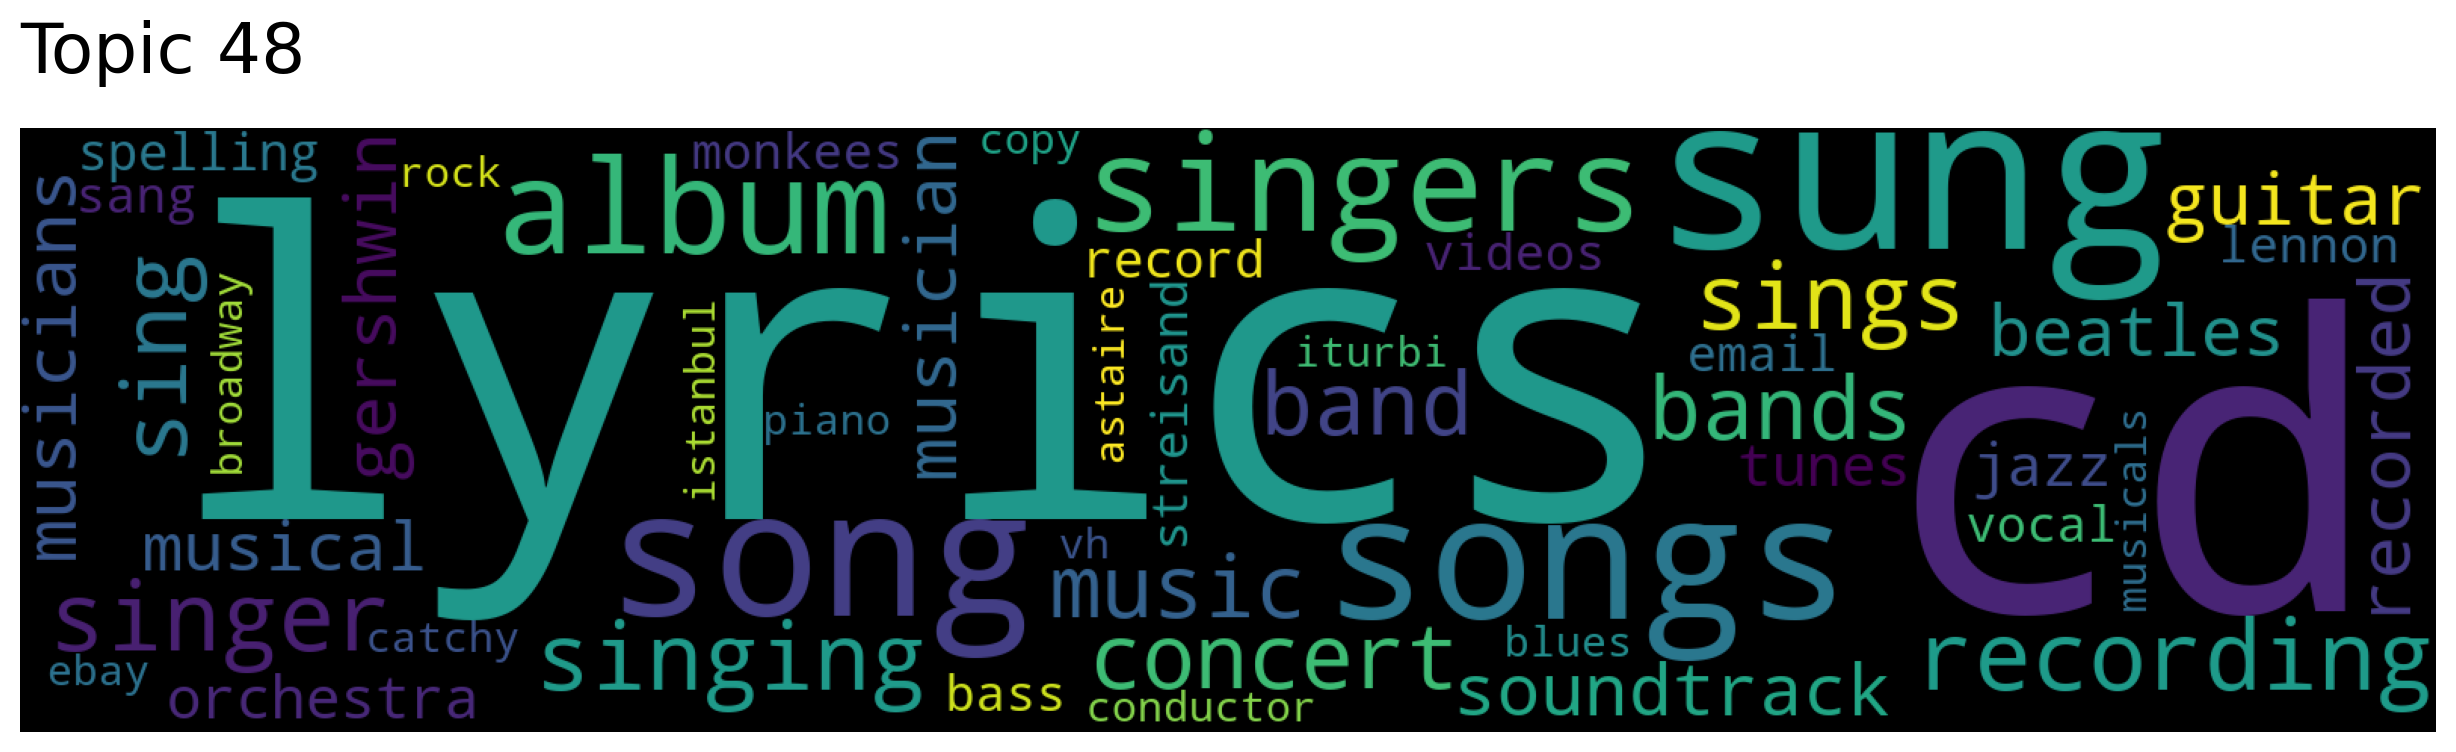

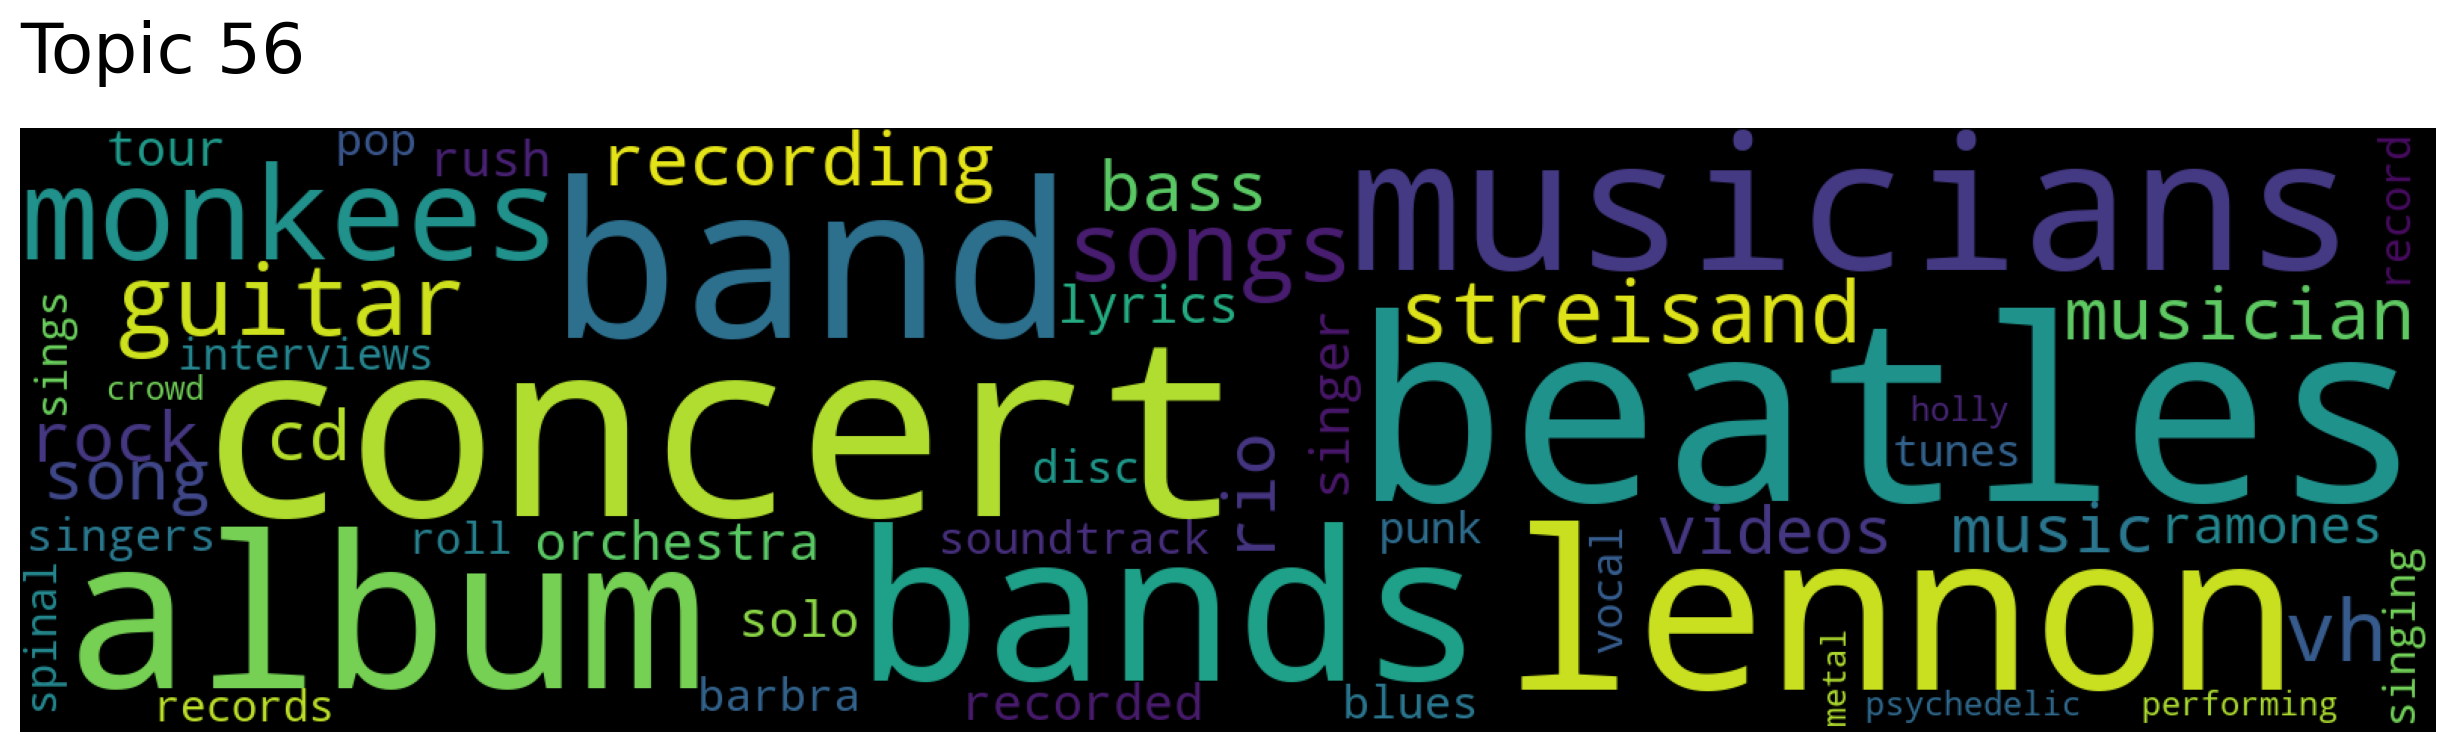

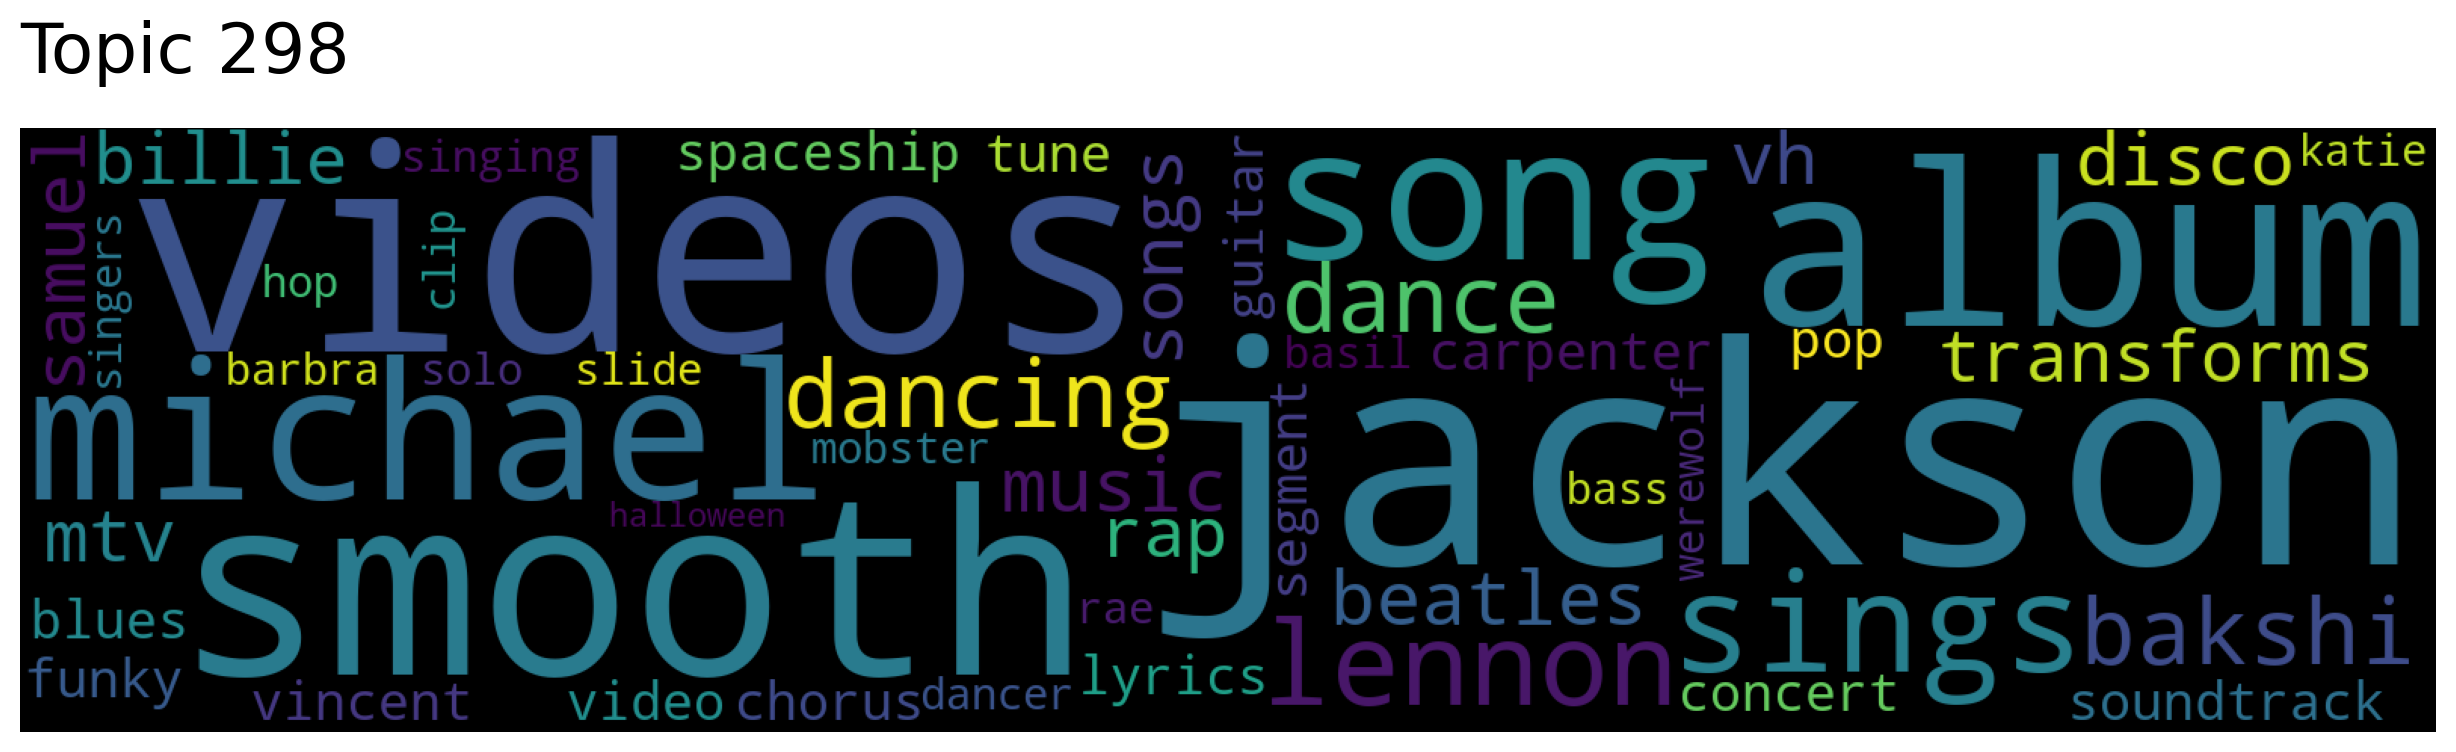

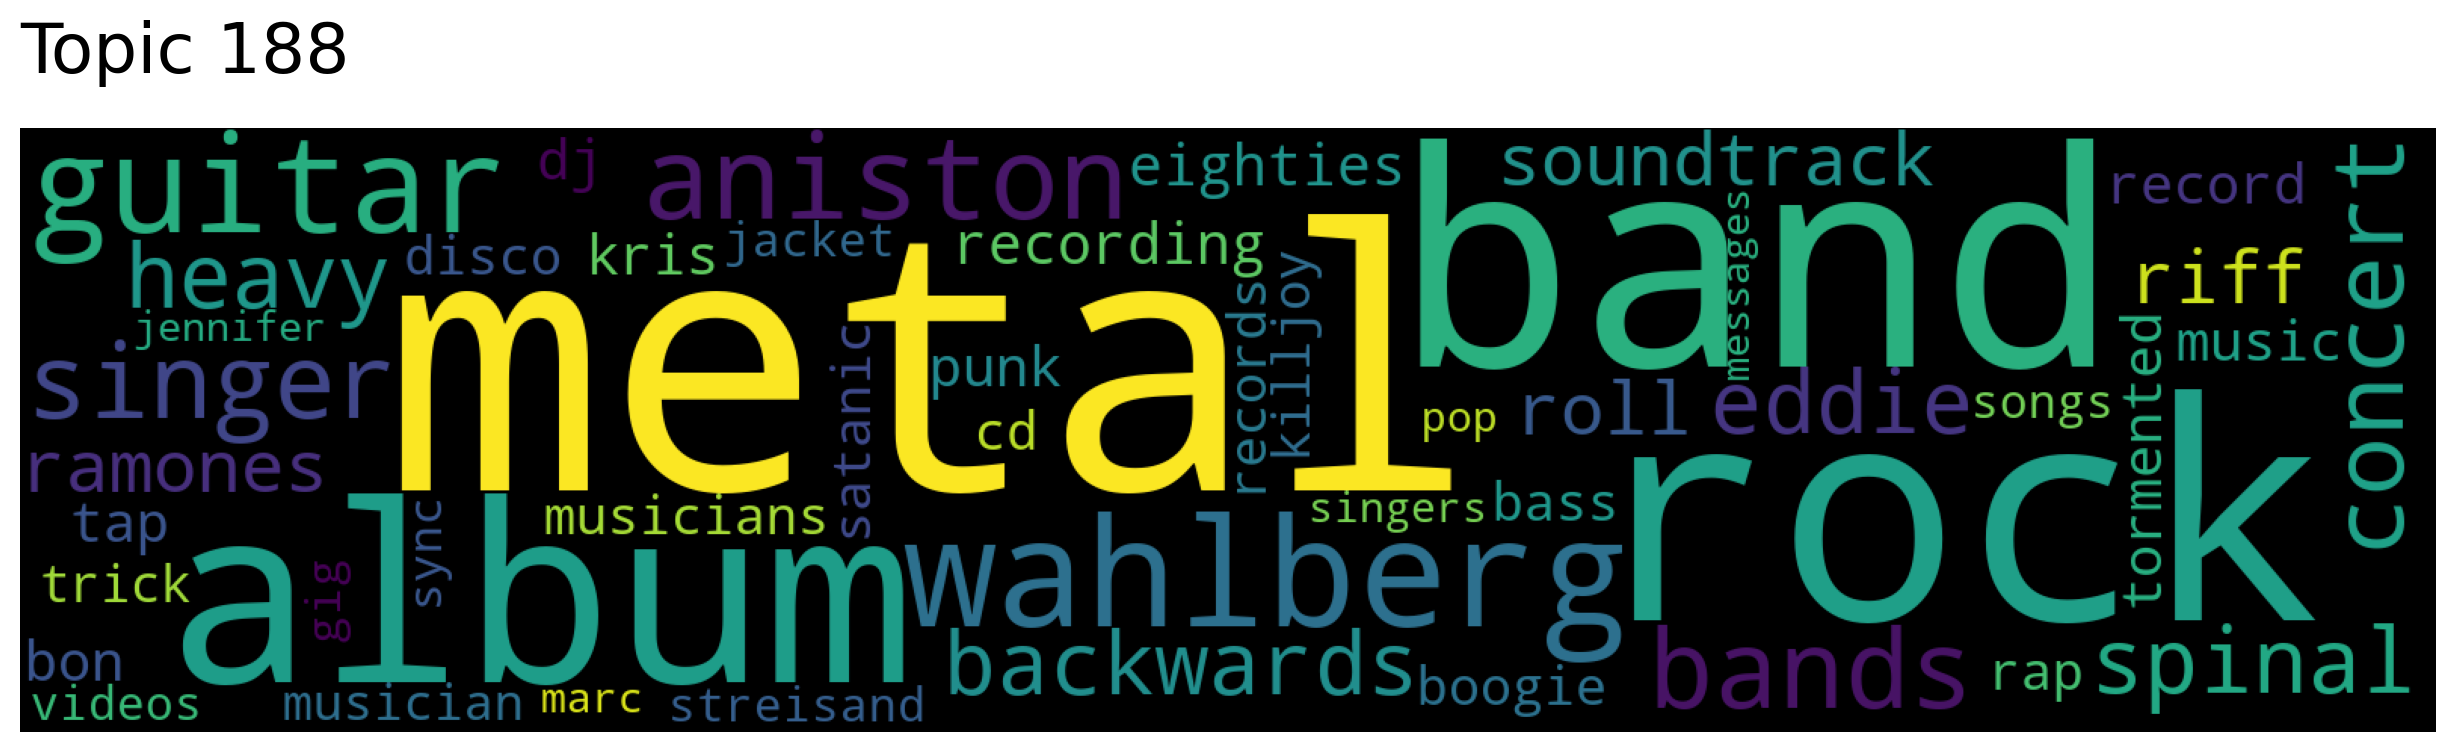

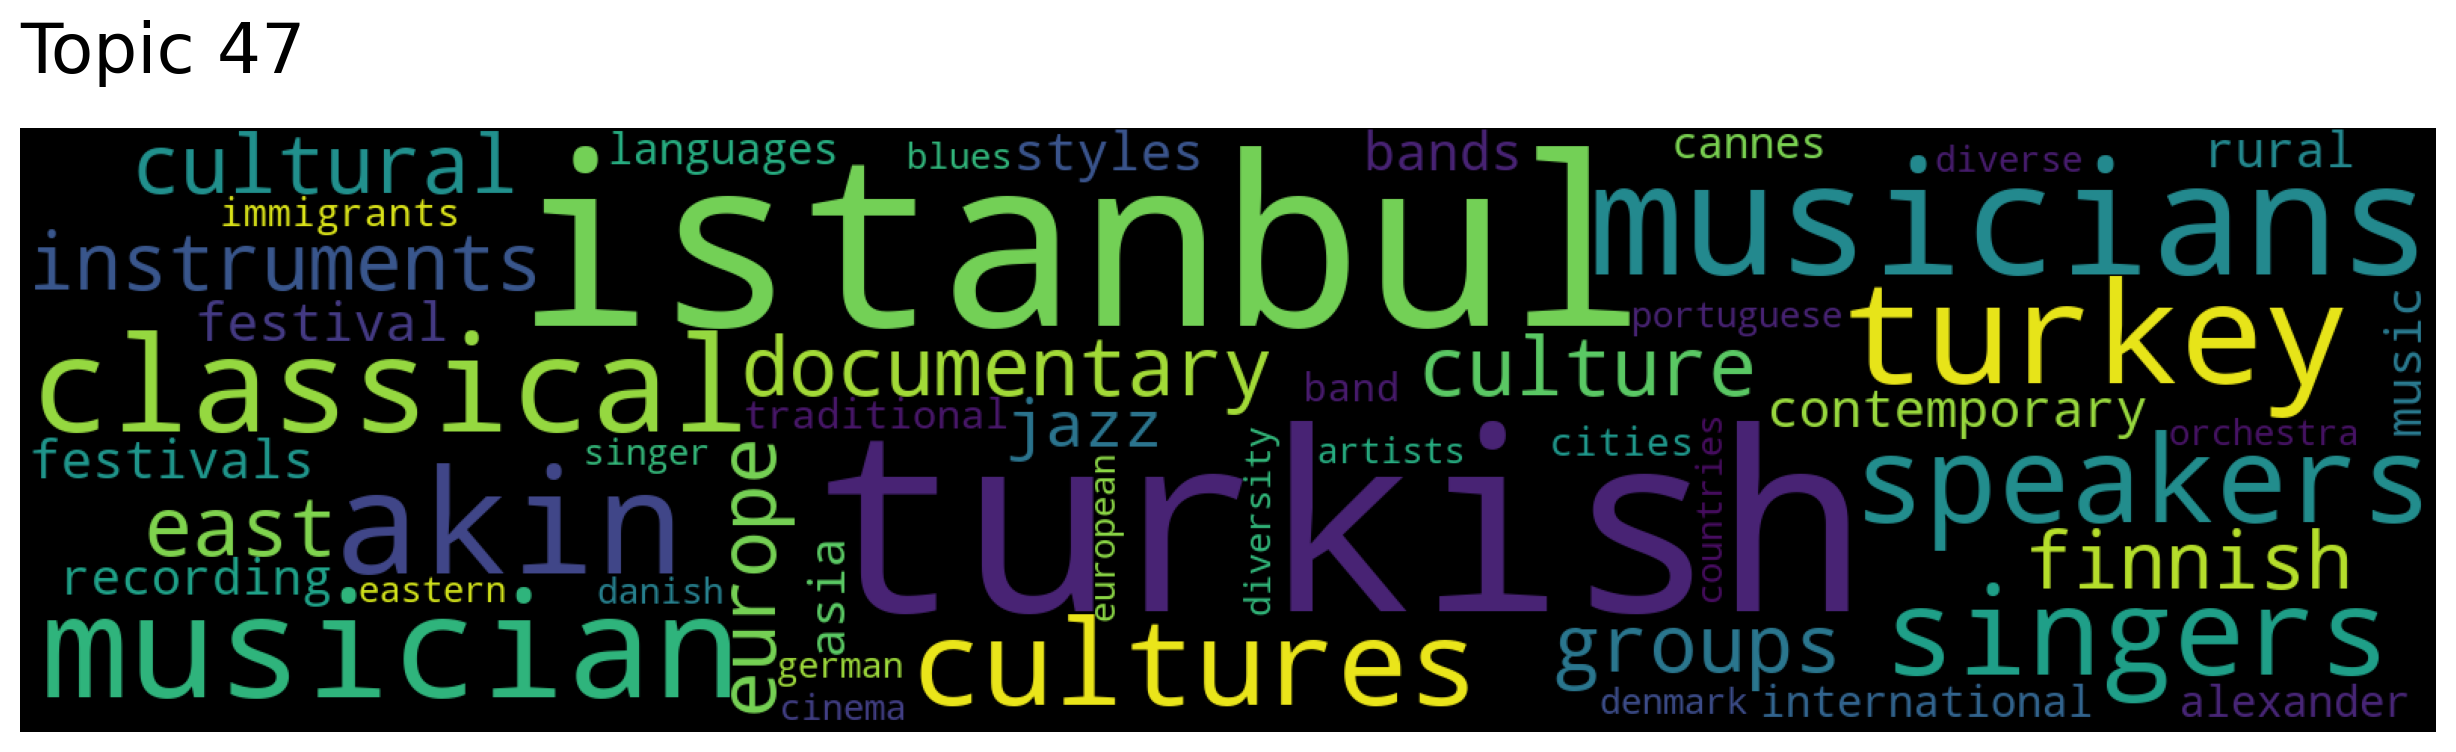

In [58]:
# search for the top 5 most similar topics to a query: "music"
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["music"],
                                                                         num_topics=5)

print("The similarity scores for the 5 most similar topics to topic music is: {0}, {1}, {2}, {3} and {4}".format(round(topic_scores[0], 2),
                                                                                                                round(topic_scores[1], 2),
                                                                                                                round(topic_scores[2], 2),
                                                                                                                round(topic_scores[3], 2),
                                                                                                                round(topic_scores[4], 2)))

# generate wordcloud for the 5 most similar topic to "music"
for topic_num in topic_nums:
    model.generate_topic_wordcloud(topic_num)

## Search Docs by Topic

Let's take a closer look at topic 298 which seem to be about Jon Lennon, Michael Jackson and music videdos.


In [61]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=298, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 18757, Score: 0.6250225305557251
-----------
Although I am not a Michael Jackson fan, I like some of his early songs and some from Jackson 5 too. 'Thriller' is one of his great songs and it comes from the best-selling album ever with the same title. As for the video, it is awesome, one of Michael's best, but also very eccentric and weird.<br /><br />There is a story behind this video, but it's so complex that even I can't fully understand it. It's freaky. The freakiest things are Jackson's transformation into a werewolf, his evil red eyes at the end (like a werewolf) and those dead people dancing.<br /><br />The video is very dark, thrilling, chilly and original. There are great sceneries and settings. The music itself is full of life and rhythm, characteristic from the good old pop from the 80's.<br /><br />I like Vincent Price's soliloquy. He does a great narration with his distinctive and unique voice and his evil laughter at the end is awesome! My favorite videos of the '

## Similar KeyWords

In [64]:
# find similar words
words, word_scores = model.similar_words(keywords=["spy"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")


espionage 0.5476725315741793
agent 0.4659685038608452
spies 0.4658833001753373
secret 0.4509405443931387
edwards 0.4009541370350189
cia 0.3982672942249842
german 0.38336768401970633
information 0.3717318419575501
lili 0.36595034699997187
thriller 0.3510623115638781
intrigue 0.34001359454901225
cypher 0.33057819809005845
secrets 0.32846289570769494
julie 0.3251673054970483
identity 0.32345139703269105
agents 0.32105699154662176
delightful 0.31246193775006526
henry 0.3118458409521562
an 0.30981604967042065
thrillers 0.30908081182779323


In [66]:
# find similar words
words, word_scores = model.similar_words(keywords=["animation"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

animated 0.8083662209208309
disney 0.6233104688958242
cartoon 0.6013768561567091
animators 0.587816272918686
backgrounds 0.5807185238987603
pixar 0.5402752800029895
cartoons 0.5101614627226426
voice 0.49014545110977736
visuals 0.4873818016206231
designs 0.4873253892755912
voices 0.48651833280525003
anime 0.47260651960716327
artwork 0.46457856695779326
graphics 0.45330080868454753
drawings 0.4532773261458617
visual 0.4510678874769328
design 0.44852138499197647
quality 0.4463562672028981
bakshi 0.43872536803328127
cg 0.43452144680959315
